In [2]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.ticker import StrMethodFormatter;

In [3]:
attenuation = 10
cablePin = np.arange(-20,1,1)
cablePout = np.array([-22.22, -21.22, -20.15, -19.32, -18.3, -17.26,\
                 -16.23, -15.27, -14.21, -13.19, -12.18, -11.1,\
                 -10.16, -9.181, -8.158, -7.183, -6.168, -5.161, -4.163, -3.181, -2.18])

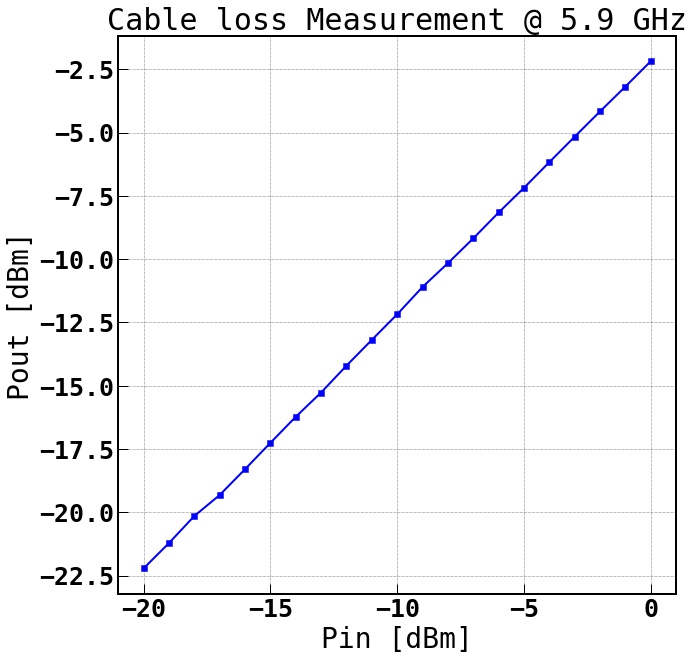

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(cablePin, cablePout, 'bs-')
ax.set_xlabel(r'Pin [dBm]')
ax.set_ylabel(r'Pout [dBm]')
ax.set_title(r'Cable loss Measurement @ 5.9 GHz')
ax.grid(which='both');
plt.savefig('cable_power_loss.png')

In [5]:
attenuation = 10 #dBm
ampPout = np.array([-17.15, -16.15, -15.08, -14.23, -13.2, -12.18, -11.16,\
                   -10.2, -9.13, -8.132, -7.133, -6.07, -5.162, -4.212, \
                   -3.245, -2.318, -1.407, -0.5222, 0.2583, 0.9407, 1.518]) + attenuation

# Determine the linear response of the amplifier using about the first 5 data points
A = np.vstack([np.ones(5), cablePout[:5]]).T
X = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, ampPout[:5]))
b = X[0] # intercept
m = X[1] # slope

In [6]:
x = np.linspace(-22.22, -2.18, 100)
y = m * x + b

In [7]:
# Want to find the 1dB compression point
ampPlinear = m * cablePout + b
diff = ampPlinear - ampPout
compPoint = np.where(diff>=1)[0][0]
ampCompressionPoint = ampPout[compPoint]
print ("The 1dB compression point at 5.9 GHz is at an output power of {0:2.1f} dBm".format(ampCompressionPoint))

The 1dB compression point at 5.9 GHz is at an output power of 10.9 dBm


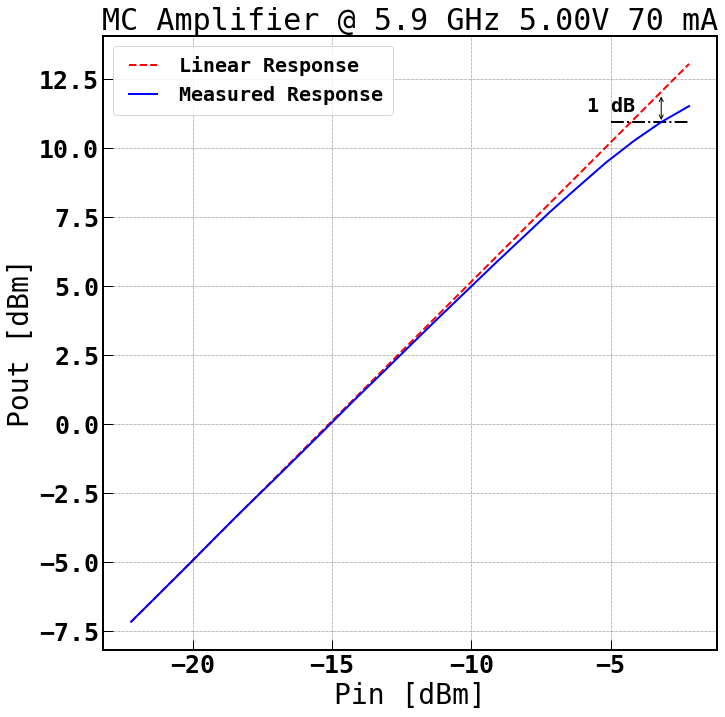

In [8]:
fig, ax = plt.subplots(figsize=(11,11))
ax.plot(x, y, 'r--', label='Linear Response')
ax.plot(cablePout, ampPout, 'b-', label='Measured Response')
ax.set_xlabel(r'Pin [dBm]')
ax.set_ylabel(r'Pout [dBm]')
ax.set_title(r'MC Amplifier @ 5.9 GHz 5.00V 70 mA')
ax.grid(which='both');
ax.axis('tight')
ax.legend(loc='best')
ax.hlines(ampCompressionPoint, -5, -2.18, 'k', label='1dB compression point', linestyles='dashdot')
# bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="0.5", alpha=0.9,  lw=2)
ax.text(-5, 11.5, "1 dB", ha='center', va='center', size=20)
ax.annotate("",
            xy=(cablePout[compPoint], ampCompressionPoint), xycoords='data',
            xytext=(cablePout[compPoint], ampCompressionPoint + 1), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3"),
            )
plt.savefig('amp_power_compression.png')

In [9]:
file20db = '3.20.csv'
file0db = '3.0.csv'

freq20, Power20 = np.loadtxt(file20db, comments='!', skiprows=16, unpack=True, delimiter=',', usecols=(0,1))
freq0, Power0 = np.loadtxt(file0db, comments='!', skiprows=16, unpack=True, delimiter=',', usecols=(0,1))

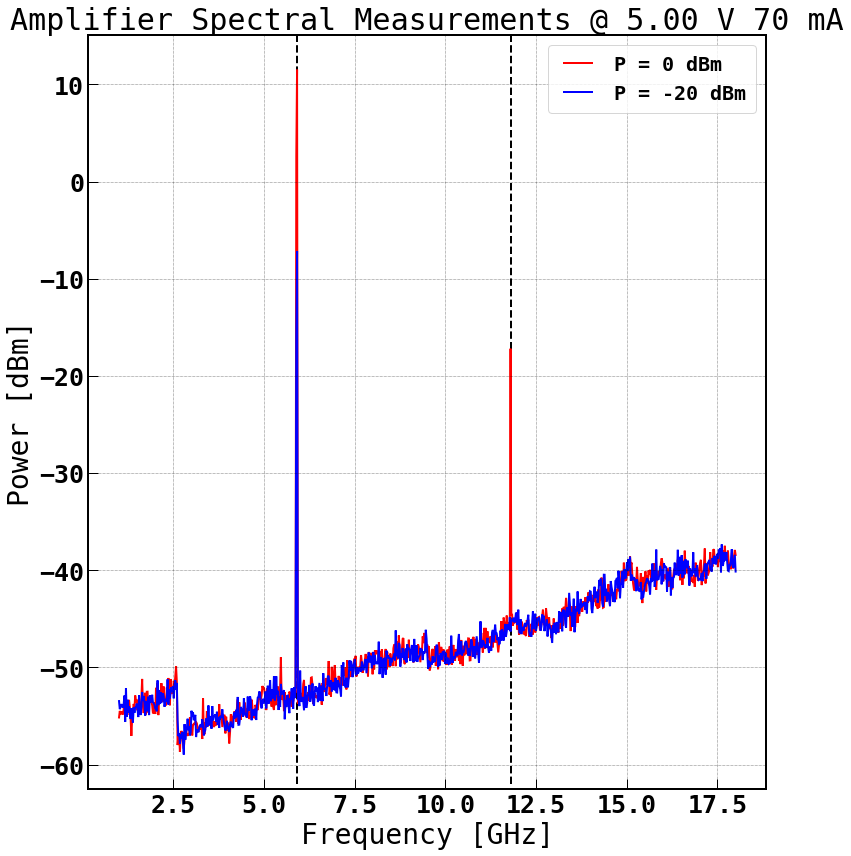

In [10]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(freq0/1e9, Power0 + attenuation, 'r-', label= 'P = 0 dBm')
ax.plot(freq20/1e9, Power20 + attenuation, 'b-', label='P = -20 dBm')
ax.grid(which='both')
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Power [dBm]')
ax.axis('tight')
ax.legend(loc='best');
ax.set_title('Amplifier Spectral Measurements @ 5.00 V 70 mA')
plt.tight_layout()
ax.vlines(5.9, -62, 15, 'k', 'dashed')
# ax.hlines(11.5, 1, 18, 'k', 'dashed')
ax.vlines(11.8, -62, 15, 'k', 'dashed')
# ax.hlines(-17.2, 1, 18, 'k', 'dashed')
plt.savefig('spectra_20dB_vs_0dB.png')

In [11]:
firstharmonic = np.max(Power0[:400]) + attenuation
print ("First Harmonic", firstharmonic, 'dBm')
secondharmonic = np.max(Power0[400:]) + attenuation
print ("Second Harmonic", secondharmonic, 'dBm')
print(firstharmonic - secondharmonic, "dBc")

First Harmonic 11.515965595 dBm
Second Harmonic -17.19743651 dBm
28.713402105 dBc
